In [1]:
#행정구역별 의료기관 현황 분석해보기
#블록맵을 시각화
#필요한 데이터 준비물
#1) 공공보건의료 기관 현황.csv
#2) 행정 구역별 시군구 인구수 엑셀 파일

##작업
##1. 행정구역별 주소 수정
##2. 행정구역별 의료기관 수 집계
##3. 행정구역별 인구수 정리
##4. 테이블 정리, 내부(공통된 행만 뽑아서), 외부(모든 행을 다 합치기)

###블록맵 : 구역의 경계선 단순화 작업하고 -> 블록(사각형모양으로) 그려서 지도에 표기
###히트맵으로 온도로 시각화하는 것과 거의 비슷

In [2]:
#데이터 수집.
#공공데이터 -> 공공보건 의료기관 데이터 csv 다운
#보건복지부_공공보건 의료기관 현황 엑셀 파일

In [3]:
import pandas as pd 
pd.set_option("mode.chained_assignment",None)
import numpy as np 

data = pd.read_csv("./공공의료기관현황.csv",index_col=0, encoding="cp949", engine="python")
data


,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,청풍호노인사랑병원,시군구립,제천시 노인전문병원 설치및 운영에 관한 조례,충청북도,해당없음,33280576,요양병원,187,27207,충청북도 제천시 금성면 청풍호로 1147,www.cplove.co.kr,043-646-0808,043-648-5827,NaN
217,충주시 노인전문병원,시군구립,충주시노인전문병원설치 및 운영에관한 조례,충청북도,해당없음,33280088,요양병원,300,27442,충청북도 충주시 동량면 대전리 1686-28,www.hyolife.com,043-855-9393,043-855-8866,NaN
218,충청북도 충주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,충청북도,해당없음,33100063,종합병원,292,27468,충청북도 충주시 안림로 239-50(안림동 134),www.cjmct.or.kr,043-871-0114,043-843-4231,NaN


In [4]:
#공공 의료기관 주소 데이터 정리 작업.
addr = pd.DataFrame(data["주소"].apply(lambda v : v.split()[:2]).tolist(),columns=["시도","군구"])

In [5]:
#해당 주소에서 1차 지역명, 2차 지역명으로 추출 후 중복제거
addr["시도"].unique()

#창원시 ->경상남도에 포함, 시도 컬럼에 있으면 안됨, 2차 지역명 군구에 있어야 함
#경산시 ->경상북도에 포함
#천안시 ->충청남도

addr[addr["시도"]=="창원시"]
addr.iloc[27] = ["경상남도","창원시"]
addr.iloc[31] = ["경상남도","창원시"]
print(addr.iloc[27])
print(addr.iloc[31])

addr[addr["시도"]=="경산시"]
addr.iloc[47] = ["경상북도","경산시"]
addr.iloc[47]

addr[addr["시도"]=="천안시"]
addr.iloc[209] = ["충청남도","천안시"]
addr.iloc[210] = ["충청남도","천안시"]
print(addr.iloc[209])
print(addr.iloc[210])
# addr.iloc[47]

addr["시도"].unique()


시도    경상남도
군구     창원시
Name: 27, dtype: object
시도    경상남도
군구     창원시
Name: 31, dtype: object
시도    충청남도
군구     천안시
Name: 209, dtype: object
시도    충청남도
군구     천안시
Name: 210, dtype: object


array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

In [6]:
#1차 지역명 통일하기
# 강원도 ->강원특별자치도
# 경기 ->경기도
# 경남 ->경상남도
# 경북 ->경상북도
# 충북 ->충청북도
# 서울시 ->서울특별시
# 부산특별시 ->부산광역시
# 기타 충남,전남,전북.. 수정
# 대전시 ->대전광역시

addr_alias = {
  "경기" : "경기도",
  "강원도" : "강원특별자치도",
  "경남" : "경상남도",
  "경북" : "경상북도",
  "충북" : "충청북도",
  "서울시" : "서울특별시",
  "부산특별시" : "부산광역시",
  "충남" : "충청남도",
  "전남" : "전라남도",
  "전북" : "전라북도",
  "대전시" : "대전광역시"
}

addr["시도"] = addr["시도"].apply(lambda v:addr_alias.get(v,v))
addr["시도"].unique()


array(['강원특별자치도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도',
       '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시',
       '충청남도', '울산광역시'], dtype=object)

In [7]:
#2차 지역명 데이터 확인
addr["군구"].unique()

#"아란13길" : 제주시로 변경하기
addr[addr["군구"]== "아란13길"]
addr.iloc[75] = ["제주특별자치도","제주시"]

#바뀐거 확인
addr["군구"].unique()
addr.iloc[75]

시도    제주특별자치도
군구        제주시
Name: 75, dtype: object

In [8]:
#행정구역별 의료기관 수 확인
#새 컬럼 추가(시도군구)
addr["시도군구"]=addr.apply(lambda r : r["시도"]+ " " +r["군구"], axis=1)
addr.head()

,시도,군구,시도군구
0,강원특별자치도,춘천시,강원특별자치도 춘천시
1,강원특별자치도,삼척시,강원특별자치도 삼척시
2,강원특별자치도,영월군,강원특별자치도 영월군
3,강원특별자치도,원주시,강원특별자치도 원주시
4,강원특별자치도,강릉시,강원특별자치도 강릉시


In [9]:
#addr위에 주소, count 컬럼 추가하기
addr["count"] = 0
addr.head()

,시도,군구,시도군구,count
0,강원특별자치도,춘천시,강원특별자치도 춘천시,0
1,강원특별자치도,삼척시,강원특별자치도 삼척시,0
2,강원특별자치도,영월군,강원특별자치도 영월군,0
3,강원특별자치도,원주시,강원특별자치도 원주시,0
4,강원특별자치도,강릉시,강원특별자치도 강릉시,0


In [10]:
#시도 군구에 대해서 집계 해보기
addr_group = pd.DataFrame(addr.groupby(["시도","군구","시도군구"],as_index= False).count())
addr_group.head()


,시도,군구,시도군구,count
0,강원특별자치도,강릉시,강원특별자치도 강릉시,4
1,강원특별자치도,동해시,강원특별자치도 동해시,1
2,강원특별자치도,삼척시,강원특별자치도 삼척시,1
3,강원특별자치도,속초시,강원특별자치도 속초시,1
4,강원특별자치도,양구군,강원특별자치도 양구군,1


In [11]:
#인덱스, 시도군구로 설정하기 
addr_group = addr_group.set_index("시도군구")
addr_group.head()


,시도,군구,count
시도군구,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4
강원특별자치도 동해시,강원특별자치도,동해시,1
강원특별자치도 삼척시,강원특별자치도,삼척시,1
강원특별자치도 속초시,강원특별자치도,속초시,1
강원특별자치도 양구군,강원특별자치도,양구군,1


In [12]:
#행정구역별 시군구 인구수 엑셀 파일 정리 -> 인구수, 2023.11
population = pd.read_excel("./행정구역데이터.xlsx")
population.head()

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51337076,25572695,25764381
1,서울특별시,소계,9390925,4543055,4847870
2,서울특별시,종로구,139497,67393,72104
3,서울특별시,중구,121230,58631,62599
4,서울특별시,용산구,214381,102925,111456


In [13]:
#1차 지역명, 2차 지역명, 모양 맞추기
#행정구역(시군구)별(1):시도
#행정구역(시군구)별(2):군구
population = population.rename(columns={"행정구역(시군구)별(1)":"시도","행정구역(시군구)별(2)":"군구"})
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51337076,25572695,25764381
1,서울특별시,소계,9390925,4543055,4847870
2,서울특별시,종로구,139497,67393,72104
3,서울특별시,중구,121230,58631,62599
4,서울특별시,용산구,214381,102925,111456


In [14]:
#군구 부분에 왼쪽 공백 제거, 새 컬럼 추가 -> 시도군구
#시도군구 새 컬럼을 -> 인덱스로 설정.
#strip : 공백 제거
for element in range(0,len(population)):
  population["군구"][element] = population["군구"][element].strip()

#시도군구 새 컬럼 추가
population["시도군구"] = population.apply(lambda r:r["시도"]+" "+r["군구"], axis=1)
population.head()

#소계부분 제거
population = population[population.군구 != "소계"]
population.head()

#인덱스 지정
population = population.set_index("시도군구")
population.head()


,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,139497,67393,72104
서울특별시 중구,서울특별시,중구,121230,58631,62599
서울특별시 용산구,서울특별시,용산구,214381,102925,111456
서울특별시 성동구,서울특별시,성동구,277701,134760,142941
서울특별시 광진구,서울특별시,광진구,335854,161430,174424


In [15]:
#데이터 병합(내부 조인, 인덱스 기준으로)
#내부조인 -> 인덱스를 기준으로, 시도군구의 행이 같은 것들만 모아서 합침
#외부 조인 -> 같은 행 상관없이 모두 합치기
addr_group.head()
addr_population_merge = pd.merge(addr_group, population, how="inner",left_index=True,right_index=True)
addr_population_merge.head()

,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,강원특별자치도,강릉시,209625,103887,105738
강원특별자치도 동해시,강원특별자치도,동해시,1,강원특별자치도,동해시,88712,45070,43642
강원특별자치도 삼척시,강원특별자치도,삼척시,1,강원특별자치도,삼척시,62819,31903,30916
강원특별자치도 속초시,강원특별자치도,속초시,1,강원특별자치도,속초시,82092,40630,41462
강원특별자치도 양구군,강원특별자치도,양구군,1,강원특별자치도,양구군,21139,11093,10046


In [16]:
#필요한 컬럼만 추출
#행정구역별 의료기관의 인구수 대비 비율 구하는게 목적
#count -> 의료기관의 수
#시도_x	군구_x	count	총인구수 (명)

local_Hospital_Population = addr_population_merge[["시도_x","군구_x","count","총인구수 (명)"]]
local_Hospital_Population.head()

,시도_x,군구_x,count,총인구수 (명)
시도군구,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,209625
강원특별자치도 동해시,강원특별자치도,동해시,1,88712
강원특별자치도 삼척시,강원특별자치도,삼척시,1,62819
강원특별자치도 속초시,강원특별자치도,속초시,1,82092
강원특별자치도 양구군,강원특별자치도,양구군,1,21139


In [17]:
#컬럼 이름 조정, 인구수 대비 의료기관 비율 새컬럼 추가.
local_Hospital_Population = local_Hospital_Population.rename(
  columns={"시도_x":"시도",
           "군구_x":"군구",
           "총인구수 (명)":"인구수"}
)
local_Hospital_Population.head()

#새 컬럼 HS_count:(병원의 숫자/인구수)*100000 = 비율
HS_count = local_Hospital_Population["count"]
local_Hospital_Population["HS_ratio"] = HS_count.div(local_Hospital_Population["인구수"],axis=0)*100000
local_Hospital_Population.head()

,시도,군구,count,인구수,HS_ratio
시도군구,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,209625,1.908169
강원특별자치도 동해시,강원특별자치도,동해시,1,88712,1.127243
강원특별자치도 삼척시,강원특별자치도,삼척시,1,62819,1.591875
강원특별자치도 속초시,강원특별자치도,속초시,1,82092,1.218145
강원특별자치도 양구군,강원특별자치도,양구군,1,21139,4.730593


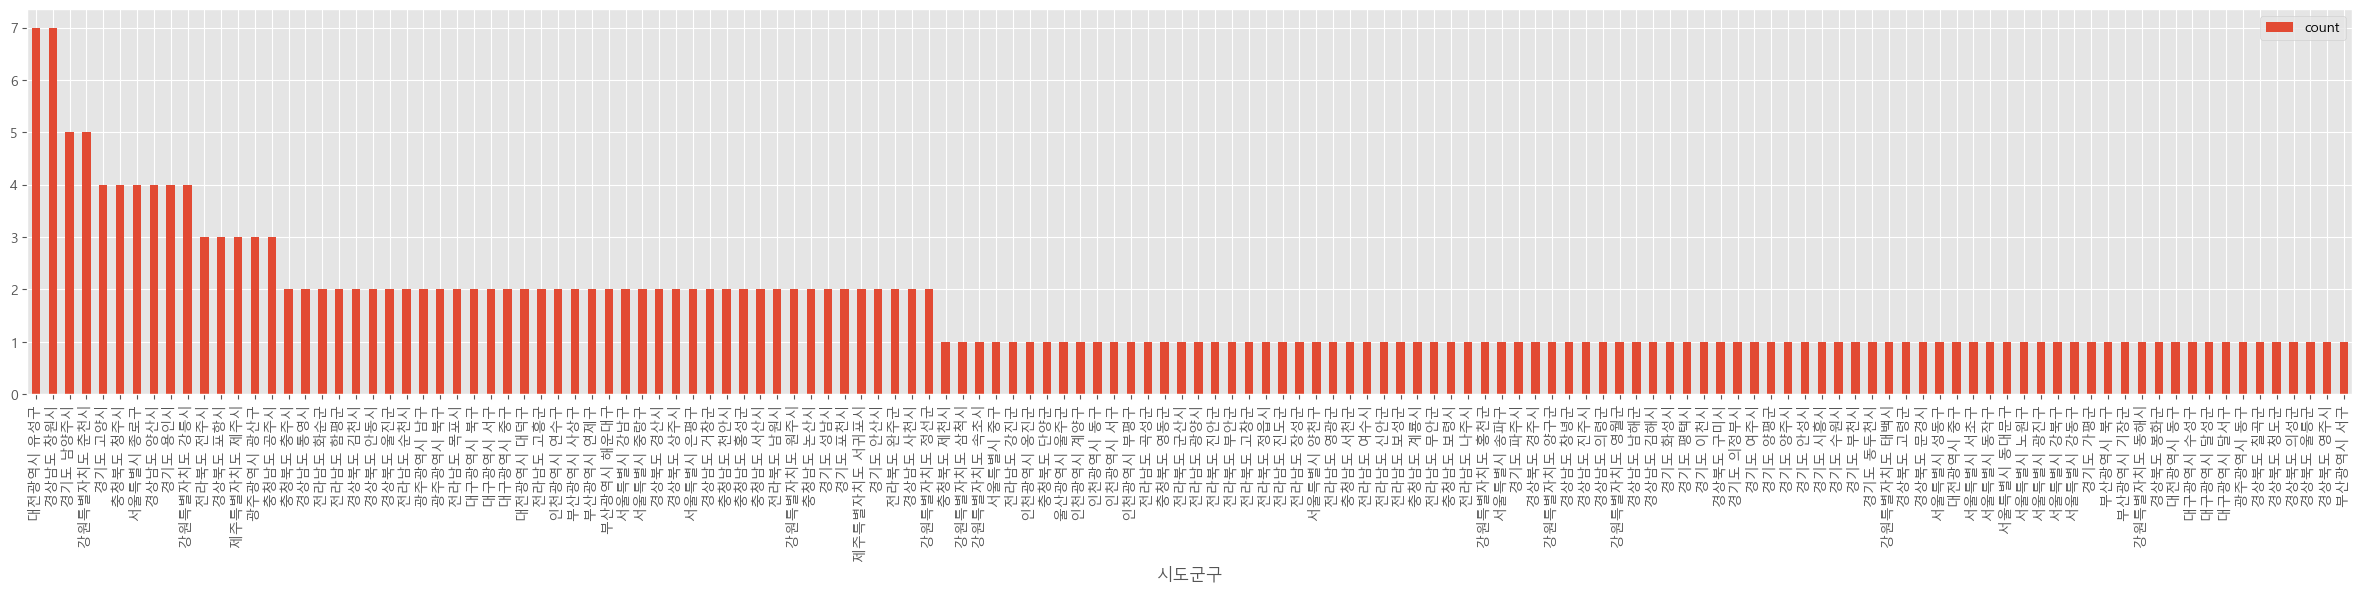

In [19]:
# 막대 그래프만 그리기. 
# 블록맵은 추가 설정이 필요해서, 다음시간에 
from matplotlib import pyplot as plt 
from matplotlib import rcParams, style
style.use("ggplot")

#폰트 지정
#rc -> runtime configuration, 표의 속성을 전역으로 설정하는 모듈,
from matplotlib import font_manager, rc 
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family = font_name)

#local_Hospital_Population["count"] ->반환값 시리즈, 시리즈(행,열 1개로 표현하는 타입)
#local_Hospital_Population[["count"]] -> 반환값 데이터 프레임(표)
HS_ratio = local_Hospital_Population[["count"]]
#HS_ratio-> 타입 : DataFrame표
HS_ratio = HS_ratio.sort_values("count", ascending=False)
#30, 단위 인치
plt.rcParams["figure.figsize"] = (30,5)
HS_ratio.plot(kind = "bar", rot = "vertical")
plt.show()


In [ ]:
#블록맵 준비
#블록맵 구성하는 각 지역마다 특정 임의의 좌표로한 데이터셋 필요
#블록맵의 경계를 나눌 샘플 좌표 데이터 필요
#데이터 출처를 조사, 

# 준비물 1 : data_draw_korea.csv
# 준비물 2
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

In [20]:
import os
#현재 작업 중 폴더 경로 불러오기
path = os.getcwd()
path


'c:\\BigData\\BigData_note\\BigdataVisualization_analyze\\ch3_지도맵-통계'

In [21]:
#준비물1 메모리에 올리기
data_draw_korea = pd.read_csv(path+"\\data_draw_korea.csv",index_col=0,encoding="utf-8",
                              engine="python")

data_draw_korea.head()


,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [22]:
#행정 구역 지역명 추출 작업
data_draw_korea["시도군구"] = data_draw_korea.apply(lambda r: r["광역시도"]+" "+r["행정구역"], axis = 1)
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역,시도군구
0,202520,강릉,11,4,1040.07,강원도,강릉시,강원도 강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군,강원도 고성군
2,86747,동해,11,5,180.01,강원도,동해시,강원도 동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시,강원도 삼척시
4,76733,속초,9,1,105.25,강원도,속초시,강원도 속초시


In [23]:
#데이터 프레임 병합 하려면 인덱스 동일하게 맞추는 작업(깔맞춤)
#시도군구 열 -> 인덱스로 설정
data_draw_korea = data_draw_korea.set_index("시도군구")
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시


In [26]:
#data_draw_korea 의 테이블, 기존에 사용하던 local_Hospital_Population 조인
#조인, 외부조인 -> 해당 조건에서 값이 일치 하지 않는 행까지(모두 다 합침.)
#만약, 해당 값이 없다면 -> NaN 집계가 됨.
data_draw_korea_local_Hospital_Population = pd.merge(data_draw_korea, local_Hospital_Population,how="outer",left_index=True,right_index=True)
data_draw_korea_local_Hospital_Population.head()

,인구수_x,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,인구수_y,HS_ratio
시도군구,,,,,,,,,,,,
강원도 강릉시,202520.0,강릉,11.0,4.0,1040.07,강원도,강릉시,NaN,NaN,NaN,NaN,NaN
강원도 고성군,25589.0,고성(강원),9.0,0.0,664.19,강원도,고성군,NaN,NaN,NaN,NaN,NaN
강원도 동해시,86747.0,동해,11.0,5.0,180.01,강원도,동해시,NaN,NaN,NaN,NaN,NaN
강원도 삼척시,63986.0,삼척,11.0,8.0,1185.80,강원도,삼척시,NaN,NaN,NaN,NaN,NaN
강원도 속초시,76733.0,속초,9.0,1.0,105.25,강원도,속초시,NaN,NaN,NaN,NaN,NaN


In [ ]:
#준비물2번 -> 지도에 각 2차지역을 사각형(블록형)을 나누는 경계선 좌표
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]


